In [43]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
# read in data and get square footage of buildings
btus = pd.read_csv('/Users/Maddie/Desktop/DSSG/heating_loads/Alaska-Building-Mean.csv')

In [45]:
btus.head()

,system:index,FD_sum,TD_sum,areaHa,capture_da,release,temperature_2m_sum,.geo
0,0_00000000000000018473,-626.971841,1936.538982,0.286874,NaN,1,1309.567141,"{""type"":""Polygon"",""coordinates"":[[[-149.878952..."
1,0_00000000000000016228,-2044.805382,2015.381312,0.373711,NaN,1,-29.424070,"{""type"":""Polygon"",""coordinates"":[[[-147.729808..."
2,0_000000000000000025d6,-2016.900174,2038.350779,0.369413,NaN,1,21.450605,"{""type"":""Polygon"",""coordinates"":[[[-147.647613..."
3,0_0000000000000000ad72,-851.829564,1611.500139,0.368092,NaN,1,759.670575,"{""type"":""Polygon"",""coordinates"":[[[-149.693052..."
4,0_00000000000000015614,-538.429856,1633.319100,0.255810,NaN,1,1094.889244,"{""type"":""Polygon"",""coordinates"":[[[-134.584235..."


In [46]:
sq_ft = np.array(btus['areaHa'].drop_duplicates().tolist())*107639

In [47]:
# sq_ft = np.sort(np.array(btus['sq_ft'].to_list()))
building_inds = np.arange(len(sq_ft))
#btus['unique_ind'] = building_inds

In [48]:
# specify bin settings
bin_range = 1000 # max square foot difference in bin
num_bins = int((max(sq_ft) - min(sq_ft))/bin_range) + 1 # total number of bins

# create bins
bins = {}
for i in range(num_bins):
    bins[i] = []
    
# fill bins
for i in range(len(sq_ft)):
    building = sq_ft[i]
    building_ind = building_inds[i]
    bin_ = int(building/bin_range)
    bins[bin_].append(building_ind)

# get count of buildings in each bin
bin_count = np.zeros(num_bins)
for i in range(num_bins):
    bin_count[i] = len(bins[i])

In [91]:
np.sort(sq_ft)[:-2909]

array([  11.04335624,   17.42654377,   17.90641837, ..., 9996.03201448,
       9999.40236593, 9999.95780874])

(array([28360., 39835., 25063.,  7094.,  2850.,  1876.,  1216.,   759.,
          602.,   478.]),
 array([  11.04335624, 1009.93480149, 2008.82624674, 3007.71769199,
        4006.60913724, 5005.50058249, 6004.39202774, 7003.28347299,
        8002.17491824, 9001.06636349, 9999.95780874]),
 <BarContainer object of 10 artists>)

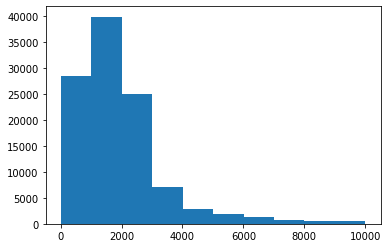

In [92]:
plt.hist(np.sort(sq_ft)[:-2909])

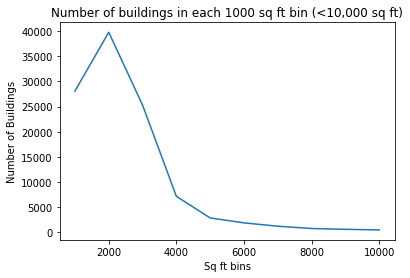

In [54]:
end = 10
plt.plot(np.arange(0, max(sq_ft), 1000)[:end]+1000, bin_count[:end]) # number of buildings per bin

plt.title("Number of buildings in each 1000 sq ft bin (<10,000 sq ft)")
plt.xlabel("Sq ft bins")
plt.ylabel("Number of Buildings")

plt.show()


In [53]:
bin_count[0]

28081.0

In [ ]:
bin_count

In [51]:
len(sq_ft)

111042

In [23]:
bin_count[:29*6]

array([6.350e+02, 7.649e+03, 7.754e+03, 2.495e+03, 1.137e+03, 7.270e+02,
       5.500e+02, 3.530e+02, 3.360e+02, 2.450e+02, 2.050e+02, 1.670e+02,
       1.410e+02, 1.220e+02, 1.180e+02, 7.100e+01, 1.070e+02, 6.200e+01,
       6.200e+01, 5.800e+01, 4.500e+01, 4.800e+01, 3.200e+01, 3.600e+01,
       4.500e+01, 3.400e+01, 2.400e+01, 2.400e+01, 2.600e+01, 2.400e+01,
       2.600e+01, 2.200e+01, 1.800e+01, 1.400e+01, 1.200e+01, 1.600e+01,
       9.000e+00, 1.100e+01, 1.500e+01, 1.100e+01, 1.700e+01, 8.000e+00,
       8.000e+00, 7.000e+00, 1.300e+01, 6.000e+00, 9.000e+00, 7.000e+00,
       1.000e+01, 9.000e+00, 1.100e+01, 9.000e+00, 1.000e+00, 1.000e+01,
       7.000e+00, 5.000e+00, 8.000e+00, 9.000e+00, 7.000e+00, 4.000e+00,
       7.000e+00, 5.000e+00, 1.200e+01, 7.000e+00, 4.000e+00, 2.000e+00,
       1.000e+00, 7.000e+00, 5.000e+00, 4.000e+00, 2.000e+00, 2.000e+00,
       5.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 3.000e+00, 2.000e+00,
       2.000e+00, 2.000e+00, 3.000e+00, 3.000e+00, 

In [20]:
bin_count[1000:]

array([], dtype=float64)

In [17]:
sum(bin_count[:1])/len(sq_ft)

0.02661246385314949

In [18]:
np.arange(0, max(sq_ft), 1000)[1]

1000.0

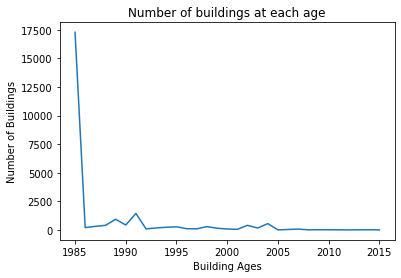

In [10]:
# plot building ages
ages = btus['age'].tolist()
uniq_ages = np.unique(ages)
ages_count_dict = {}
for a in ages:
    if a not in ages_count_dict.keys():
        ages_count_dict[a] = 0
    ages_count_dict[a] +=1

plt.plot(uniq_ages, ages_count_dict.values())
plt.title("Number of buildings at each age")
plt.xlabel("Building Ages")
plt.ylabel("Number of Buildings")

plt.show()

In [8]:
uniq_ages

array([1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015])

In [85]:
# generate bin probabilities for sampling
bin_probs = bin_count/sum(bin_count)

# choose bins based on bin probabilities
bins_to_sample = np.random.choice(np.arange(num_bins),  len(sq_ft),  p=bin_probs)

# train, val, test split
num_train = int(.6 *len(sq_ft))
num_val = int(.2 *len(sq_ft))
num_test = len(sq_ft) - num_train - num_val

train_bins = bins_to_sample[:num_train]
val_bins = bins_to_sample[num_train:num_val]
test_bins = bins_to_sample[num_val:]


In [86]:
# now randomly choose buildings from bins for train
sampled_buildings_train = []
for bin_ind in train_bins:
    choice = np.random.choice(bins[bin_ind])
    sampled_buildings_train.append(choice)
    
    # remove it from the bins so it won't be sampled in val or test
    bins[bin_ind].remove(choice)
    
# now randomly choose buildings from bins for val
sampled_buildings_val = []
for bin_ind in val_bins:
    choice = np.random.choice(bins[bin_ind])
    sampled_buildings_val.append(choice)
    
    # remove it from the bins so it won't be sampled in test
    bins[bin_ind].remove(choice)

# now randomly choose buildings from bins for test
sampled_buildings_test = []
for bin_ind in val_bins:
    choice = np.random.choice(bins[bin_ind])
    sampled_buildings_test.append(choice)


ValueError: 'a' cannot be empty unless no samples are taken

In [ ]:
# TODO: are we sampling from bins too much?